In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import datasets
import os
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
#Create path for the data

input1 = "../Data/Part1.csv"
input3 = "../Data/Part3.csv"


In [3]:
# Import the data
df = pd.read_csv(os.path.abspath(input1), sep=",")
df2 = pd.read_csv(os.path.abspath(input3), sep=",")


In [4]:
#Create a profile to have a description of the data
profile = ProfileReport(df, title = "Pandas Profiling Report part 1")

In [5]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.head()
df = pd.DataFrame(data=df)
df.dtypes
df2.dtypes

CLIENT_ID      object
CLIENT_TYPE    object
dtype: object

In [8]:
df.set_index("CLIENT_ID",inplace = True)


Text(0.5, 1.0, 'Distribution of the cost in each course')

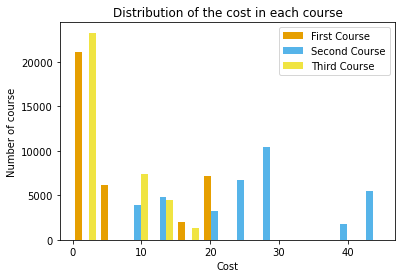

In [9]:
##  Plot of the distribution of the cost in each course 


# Make a separate list for each course
x1 = list(df['FIRST_COURSE'])
x2 = list(df['SECOND_COURSE'])
x3 = list(df['THIRD_COURSE'])

# Assign colors for each course and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']

names = ['First Course', 'Second Course', 'Third Course']

         
# Make the histogram using a list of lists
# Assign colors and names
plt.hist([x1, x2, x3], bins = int(180/15),
         color = colors, label = names)

# Plot formatting
plt.legend()
plt.xlabel('Cost')
plt.ylabel('Number of course')
plt.title('Distribution of the cost in each course')

Text(0.5, 1.0, 'Distribution of the course price during the lunch')

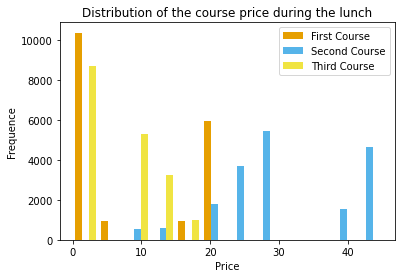

In [10]:
##  plot of the distribution of the cost in each time 
## Lunch

# Make a separate list for each course
x1 = list(df[df['TIME'] == 'LUNCH']['FIRST_COURSE'])
x2 = list(df[df['TIME'] == 'LUNCH']['SECOND_COURSE'])
x3 = list(df[df['TIME'] == 'LUNCH']['THIRD_COURSE'])

# Assign colors for each course and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']

names = ['First Course', 'Second Course', 'Third Course']

         
# Make the histogram using a list of lists
# Assign colors and names
plt.hist([x1, x2, x3], bins = int(180/15),
         color = colors, label = names)

# Plot formatting
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequence')
plt.title('Distribution of the course price during the lunch')

Text(0.5, 1.0, 'Distribution of the course price during the dinner')

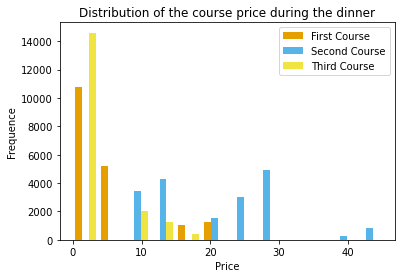

In [11]:
##  plot of the distribution of the cost in each time 
## Dinner

# Make a separate list for each course
x1 = list(df[df['TIME'] == 'DINNER']['FIRST_COURSE'])
x2 = list(df[df['TIME'] == 'DINNER']['SECOND_COURSE'])
x3 = list(df[df['TIME'] == 'DINNER']['THIRD_COURSE'])

# Assign colors for each course and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']

names = ['First Course', 'Second Course', 'Third Course']

         
# Make the histogram using a list of lists
# Assign colors and names
plt.hist([x1, x2, x3], bins = int(180/15),
         color = colors, label = names)

# Plot formatting
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequence')
plt.title('Distribution of the course price during the dinner')

In [12]:
## Create a function to comppute the price of drinks

menu_1_price = [3,15,20]
menu_2_price = [9,20,25,40]
menu_3_price = [10,15]
def price_drink(df, menu) :
    drinkPriceList = []
    for i in df.values:
        drink_price = 10000000 #high value to be able to start the loop the right way
        for j in menu :
            if(i >= j):
                drink_price = min(abs(i-j), drink_price);
            else : 
                if (drink_price == 10000000) : 
                    drink_price = 0 
                break;   
        if drink_price not in menu:
            drinkPriceList.append(drink_price)
        else: 
            drinkPriceList.append(0.0)
    return drinkPriceList


In [13]:
menuFood1 = ["Soup","Tomato-Mozarella","Oysters"]
menuFood2 = ["Salad","Spaghetti","Steak","Lobster"]
menuFood3 = ["Pie","Ice cream"]

def whichMeal(dfCourse,dfDrink,menuFood,menuDrink):
    FoodList = []
    for i in (dfCourse.values - dfDrink.values):
        #print(i)
        if i == 0.0 :
            FoodList.append("NO FOOD")
        else :    
            for j in range(len(menuDrink)):
                if i == menuDrink[j]:
                    FoodList.append(menuFood[j])
    return FoodList                
                

In [14]:
## Add columns to the data for the price of drinks
df["first_drink"] = price_drink(df["FIRST_COURSE"],menu_1_price)
df["second_drink"] = price_drink(df["SECOND_COURSE"],menu_2_price)
df["third_drink"] = price_drink(df["THIRD_COURSE"],menu_3_price)
df["first_meal"] = whichMeal(df["FIRST_COURSE"],df["first_drink"],menuFood1,menu_1_price)
df["second_meal"] = whichMeal(df["SECOND_COURSE"],df["second_drink"],menuFood2,menu_2_price)
df["third_meal"] = whichMeal(df["THIRD_COURSE"],df["third_drink"],menuFood3,menu_3_price)



[1 1 3 ... 2 3 2]


<ipython-input-15-7e2cdcb14ab7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp["labels"] = labels
<ipython-input-15-7e2cdcb14ab7>:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=labels.astype(np.float))
<ipython-input-15-7e2cdcb14ab7>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show

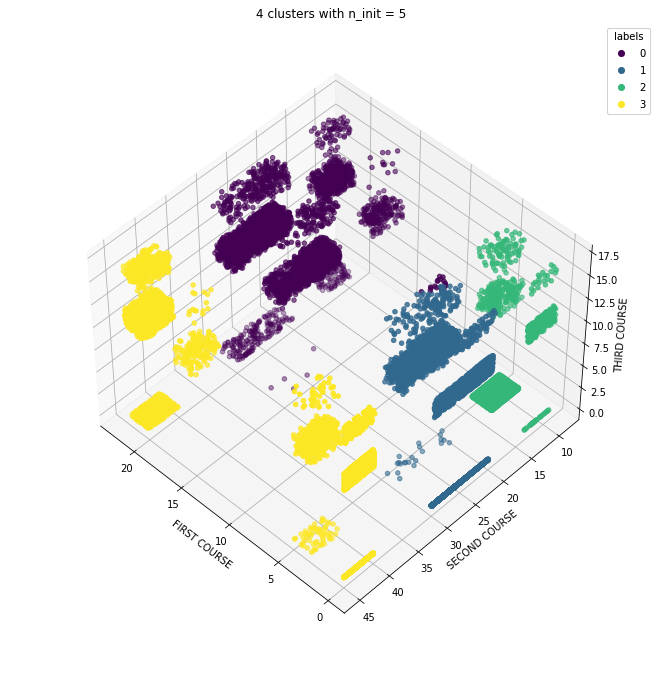

In [15]:
## Kmeans clustering
#X = df.iloc[:,1:4]
dftemp = df[["FIRST_COURSE","SECOND_COURSE","THIRD_COURSE"]]

X = np.array(dftemp)


n_initList = [5,10,100]

estimators = [("4 clusters with n_init = 5" ,KMeans(n_clusters=4, n_init = 100))
            #("4 clusters with n_init = 10" ,KMeans(n_clusters=4, n_init = 10)),
             #("4 clusters with n_init = 100" ,KMeans(n_clusters=4, n_init = 100))
            ]

   # est= KMeans(n_clusters=4, n_init = 1000)
fignum = 1



for title, est in estimators :

    fig = plt.figure(fignum, figsize=(12, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    
    print(labels)
    dftemp["labels"] = labels
    
    
    #print(dftemp.[labels==0]["FIRST COURSE"])
    
    
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=labels.astype(np.float))
    
    #ax.scatter(dftemp[labels==0]['FIRST COURSE'],c=labels.astype(np.float), color='red')
    
    
        
    legend = ax.legend(*scatter.legend_elements(),title="labels")
    
    
    ax.add_artist(legend)
    
    
    #ax.scatter(X[:, 0], X[:, 1], X[:, 2],
       #        c=labels.astype(np.float), label = ["0","1","2","3"])



    
    ax.set_xlabel('FIRST COURSE')
    ax.set_ylabel('SECOND COURSE')
    ax.set_zlabel('THIRD COURSE')
    #ax.scatter(df[df['labels'] == 0],c=labels.astype(np.float), color='red')
    ax.set_title(title)
    ax.dist = 12
    fignum += 1


    fig.show()


In [16]:


## Attribute label(client type) from the clustering to each client

df["labels"]= dftemp['labels']

Labels=[]
for i in df["labels"].values:
    if i == 3:
        Labels.append("Retirement")
    elif i == 1 :
        Labels.append("Business")
    elif i == 0 :
        Labels.append("Healthy")    
    elif i == 2 :
        Labels.append("Onetime")   
        
df["CLIENT_TYPE"] = Labels  

df.head()

TIME  FIRST_COURSE  SECOND_COURSE  THIRD_COURSE  first_drink  \
CLIENT_ID                                                                   
ID063527    LUNCH      0.000000      22.314750     10.106081     0.000000   
ID951225   DINNER      0.000000      28.779587      0.000000     0.000000   
ID655745    LUNCH      0.000000      43.529032     10.914995     0.000000   
ID381194   DINNER      3.427772      23.046017     16.275532     0.427772   
ID660862   DINNER      0.000000      25.828031      0.000000     0.000000   

           second_drink  third_drink first_meal second_meal third_meal  \
CLIENT_ID                                                                
ID063527       2.314750     0.106081    NO FOOD   Spaghetti        Pie   
ID951225       3.779587     0.000000    NO FOOD       Steak    NO FOOD   
ID655745       3.529032     0.914995    NO FOOD     Lobster        Pie   
ID381194       3.046017     1.275532       Soup   Spaghetti  Ice cream   
ID660862       0.828031     0.000000    NO FOOD       Steak    NO FOOD   

           labels CLIENT_TYPE  
CLIENT_ID                      
ID063527        1    Business  
ID951225        1    Business  
ID655745        3  Retirement  
ID381194        1    Business  
ID660862        1    Business

In [17]:
## Create a dataframe to build a confusion matrix 
df_matrix = df[["CLIENT_TYPE"]]
df_matrix["Expected"] = df2["CLIENT_TYPE"].values


df_matrix.head()

<ipython-input-17-bd344b40df7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix["Expected"] = df2["CLIENT_TYPE"].values


CLIENT_TYPE    Expected
CLIENT_ID                        
ID063527     Business    Business
ID951225     Business     Onetime
ID655745   Retirement    Business
ID381194     Business  Retirement
ID660862     Business     Onetime

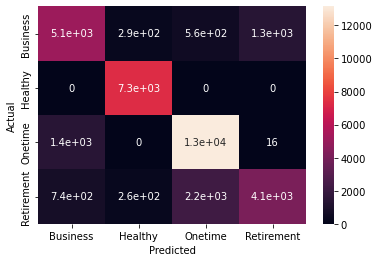

In [56]:
## Confusion matrix to compare the simulation with actual data

df_matrix = pd.DataFrame(df_matrix, columns=['Expected','CLIENT_TYPE'])
confusion_matrix = pd.crosstab(df_matrix['Expected'], df_matrix['CLIENT_TYPE'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)

plt.show()

In [14]:
## Determine the nume of observation per client type 
df3 = df2.groupby('CLIENT_TYPE').size()
df3.head()

CLIENT_TYPE
Business       7305
Healthy        7338
Onetime       14589
Retirement     7268
dtype: int64

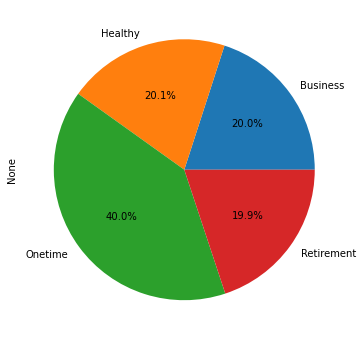

In [15]:
#Can you determine the distribution of clients (how many of each group do I expect)
#So answering the question “what type of client is this"

#df3.plot(layout=(3,1), figsize=(20.0, 18.0), grid=True, kind="hist", bins=3, stacked=True)
df3.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.1f%%')
plt.show()



In [45]:
#Can you determine the likelihood for each of these clients to get a certain course.
#So answering the question “How likely is this type of client to get a starter, main and dessert?”
# I merge the two datasets since we don't have the result of the 2 part yet
df = df.drop(columns="CLIENT_TYPE")

In [46]:
df.head()

TIME  FIRST_COURSE  SECOND_COURSE  THIRD_COURSE  first_drink  \
CLIENT_ID                                                                   
ID063527    LUNCH      0.000000      22.314750     10.106081     0.000000   
ID951225   DINNER      0.000000      28.779587      0.000000     0.000000   
ID655745    LUNCH      0.000000      43.529032     10.914995     0.000000   
ID381194   DINNER      3.427772      23.046017     16.275532     0.427772   
ID660862   DINNER      0.000000      25.828031      0.000000     0.000000   

           second_drink  third_drink first_meal second_meal third_meal  labels  
CLIENT_ID                                                                       
ID063527       2.314750     0.106081    NO FOOD   Spaghetti        Pie       1  
ID951225       3.779587     0.000000    NO FOOD       Steak    NO FOOD       1  
ID655745       3.529032     0.914995    NO FOOD     Lobster        Pie       3  
ID381194       3.046017     1.275532       Soup   Spaghetti  Ice cream       1  
ID660862       0.828031     0.000000    NO FOOD       Steak    NO FOOD       1

In [47]:

join_df = df.merge(df2, on='CLIENT_ID', how='left')
join_df.head()


CLIENT_ID    TIME  FIRST_COURSE  SECOND_COURSE  THIRD_COURSE  first_drink  \
0  ID063527   LUNCH      0.000000      22.314750     10.106081     0.000000   
1  ID951225  DINNER      0.000000      28.779587      0.000000     0.000000   
2  ID655745   LUNCH      0.000000      43.529032     10.914995     0.000000   
3  ID381194  DINNER      3.427772      23.046017     16.275532     0.427772   
4  ID660862  DINNER      0.000000      25.828031      0.000000     0.000000   

   second_drink  third_drink first_meal second_meal third_meal  labels  \
0      2.314750     0.106081    NO FOOD   Spaghetti        Pie       1   
1      3.779587     0.000000    NO FOOD       Steak    NO FOOD       1   
2      3.529032     0.914995    NO FOOD     Lobster        Pie       3   
3      3.046017     1.275532       Soup   Spaghetti  Ice cream       1   
4      0.828031     0.000000    NO FOOD       Steak    NO FOOD       1   

  CLIENT_TYPE  
0    Business  
1     Onetime  
2    Business  
3  Retirement  
4     Onetime

In [48]:
## Create a dataframe whrere there are the data of only one type of customer 
df_business = join_df[join_df["CLIENT_TYPE"] == "Business"][["FIRST_COURSE","SECOND_COURSE","THIRD_COURSE","first_meal","second_meal","third_meal"]]
df_onetime = join_df[join_df["CLIENT_TYPE"] == "Onetime"][["FIRST_COURSE","SECOND_COURSE","THIRD_COURSE","first_meal","second_meal","third_meal"]]
df_healthy = join_df[join_df["CLIENT_TYPE"] == "Healthy"][["FIRST_COURSE","SECOND_COURSE","THIRD_COURSE","first_meal","second_meal","third_meal"]]
df_retirement = join_df[join_df["CLIENT_TYPE"] == "Retirement"][["FIRST_COURSE","SECOND_COURSE","THIRD_COURSE","first_meal","second_meal","third_meal"]]



In [49]:
## Divide the number of course for each customer on the total to get the likelihood 
b= (df_business!=0).sum()/df_business.count()
o= (df_onetime!=0).sum()/df_onetime.count()
h= (df_healthy!=0).sum()/df_healthy.count()
r= (df_retirement!=0).sum()/df_retirement.count()
#
print("Likelihood of businessman to take different course","\n", b[0:3]*100,"\n")
print("Likelihood of onetime customers to take different course","\n", o[0:3]*100,"\n")
print("Likelihood of healthy customers to take different course", "\n",h[0:3]*100,"\n")
print("Likelihood of retired customers to take different course", "\n",r[0:3]*100,"\n")




Likelihood of businessman to take different course 
 FIRST_COURSE      69.650924
SECOND_COURSE    100.000000
THIRD_COURSE      80.424367
dtype: float64 

Likelihood of onetime customers to take different course 
 FIRST_COURSE       0.130235
SECOND_COURSE    100.000000
THIRD_COURSE       0.130235
dtype: float64 

Likelihood of healthy customers to take different course 
 FIRST_COURSE     100.000000
SECOND_COURSE    100.000000
THIRD_COURSE       0.913055
dtype: float64 

Likelihood of retired customers to take different course 
 FIRST_COURSE      90.148597
SECOND_COURSE    100.000000
THIRD_COURSE     100.000000
dtype: float64 



In [50]:
## Probability of certain type of customer ordering a certain dish 


In [54]:
## Cross table of different dish for the starter (First meal)
first_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["first_meal"],margins=True, margins_name='Total')


first_meal.index= ["Business","Healthy","Onetime","Retirement","Total"]
first_meal["Oysters"] = first_meal["Oysters"].div(first_meal["Total"].values)
first_meal["Soup"] = first_meal["Soup"].div(first_meal["Total"].values)
first_meal["Tomato-Mozarella"] = first_meal["Tomato-Mozarella"].div(first_meal["Total"].values)
first_meal["NO FOOD"] = first_meal["NO FOOD"].div(first_meal["Total"].values)


## It's the frequence of each dish per course
## the variable no food is not a the frequence 
## The variable no food means that they did not order something for the first course


first_meal

first_meal   NO FOOD   Oysters      Soup  Tomato-Mozarella  Total
Business    0.303491  0.633812  0.062697          0.000000   7305
Healthy     0.000000  0.000000  1.000000          0.000000   7338
Onetime     0.998698  0.000754  0.000206          0.000343  14589
Retirement  0.098514  0.352642  0.276555          0.272289   7268
Total       0.479534  0.197370  0.268740          0.054356  36500

In [53]:
## Cross table of different dish for the second meal (Main)
second_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["second_meal"],margins = True, margins_name = 'Total')

second_meal.index= ["Business","Healthy","Onetime","Retirement","Total"]
second_meal["Lobster"] = second_meal["Lobster"].div(second_meal["Total"].values)
second_meal["Salad"] = second_meal["Salad"].div(second_meal["Total"].values)
second_meal["Spaghetti"] = second_meal["Spaghetti"].div(second_meal["Total"].values)
second_meal["Steak"] = second_meal["Steak"].div(second_meal["Total"].values)


## It's the frequence of each dish per course
second_meal

second_meal   Lobster     Salad  Spaghetti     Steak  Total
Business     0.700068  0.102943   0.096099  0.100890   7305
Healthy      0.000000  1.000000   0.000000  0.000000   7338
Onetime      0.097471  0.000000   0.096785  0.805744  14589
Retirement   0.102229  0.100303   0.600303  0.197166   7268
Total        0.199425  0.241616   0.177452  0.381507  36500

In [55]:
## Cross table of different dish for the third meal (Dessert)
third_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["third_meal"],margins = True, margins_name = 'Total')

third_meal['Total'] = third_meal['Total']-third_meal['NO FOOD']
third_meal.index = ["Business","Healthy","Onetime","Retirement","Total"]
third_meal["Ice cream"] = third_meal["Ice cream"].div(third_meal["Total"].values)
third_meal["Pie"] = third_meal["Pie"].div(third_meal["Total"].values)
third_meal["NO FOOD"] = third_meal["NO FOOD"].div(third_meal["Total"].values)


## It's the frequence of each dish per course
## the variable no food is not a the frequence 
## The variable no food means that they did not order something for the third course
third_meal

third_meal  Ice cream     NO FOOD       Pie  Total
Business     0.101447    0.243404  0.898553   5875
Healthy      1.000000  108.522388  0.000000     67
Onetime      0.000000  766.842105  1.000000     19
Retirement   0.098514    0.000000  0.901486   7268
Total        0.104241    1.759090  0.895759  13229

In [56]:
## Distribution of dishes, per course, per customer 
##For example, once you have labelled all clients
##you can just check the averages of how often a client of this type gets a starters, or main, or a dessert. 
##similarly you can do it for the indidivual dishes.


In [57]:
print("Distribution of First course by type of client when they go to the restaurant", "\n", "\n", first_meal['Total']/(first_meal['Total']+second_meal['Total']+third_meal['Total']), "\n" )
print("Distribution of Second course by type of client when they go to the restaurant", "\n", "\n", second_meal['Total']/(first_meal['Total']+second_meal['Total']+third_meal['Total']), "\n" )
print("Distribution of Third course by type of client when they go to the restaurant", "\n", "\n", third_meal['Total']/(first_meal['Total']+second_meal['Total']+third_meal['Total']) , "\n")



Distribution of First course by type of client when they go to the restaurant 
 
 Business      0.356602
Healthy       0.497728
Onetime       0.499675
Retirement    0.333333
Total         0.423291
Name: Total, dtype: float64 

Distribution of Second course by type of client when they go to the restaurant 
 
 Business      0.356602
Healthy       0.497728
Onetime       0.499675
Retirement    0.333333
Total         0.423291
Name: Total, dtype: float64 

Distribution of Third course by type of client when they go to the restaurant 
 
 Business      0.286795
Healthy       0.004545
Onetime       0.000651
Retirement    0.333333
Total         0.153417
Name: Total, dtype: float64 



In [58]:
first_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["first_meal"],margins = True, margins_name = 'Total')
first_meal['Total'] = first_meal['Total']-first_meal['NO FOOD']


second_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["second_meal"],margins = True, margins_name = 'Total')


third_meal = pd.crosstab(index = join_df["CLIENT_TYPE"], 
                           columns = join_df["third_meal"],margins = True, margins_name = 'Total')
third_meal['Total'] = third_meal['Total']-third_meal['NO FOOD']



In [59]:
join_df

CLIENT_ID    TIME  FIRST_COURSE  SECOND_COURSE  THIRD_COURSE  \
0      ID063527   LUNCH      0.000000      22.314750     10.106081   
1      ID951225  DINNER      0.000000      28.779587      0.000000   
2      ID655745   LUNCH      0.000000      43.529032     10.914995   
3      ID381194  DINNER      3.427772      23.046017     16.275532   
4      ID660862  DINNER      0.000000      25.828031      0.000000   
...         ...     ...           ...            ...           ...   
36495  ID726549  DINNER      0.000000      44.184765      0.000000   
36496  ID997843   LUNCH     20.146769      40.594473     10.488270   
36497  ID326928  DINNER      3.405544      10.087976      0.000000   
36498  ID184797   LUNCH      0.000000      41.252706     11.432494   
36499  ID283943  DINNER      3.448664      13.912251      0.000000   

       first_drink  second_drink  third_drink first_meal second_meal  \
0         0.000000      2.314750     0.106081    NO FOOD   Spaghetti   
1         0.000000      3.779587     0.000000    NO FOOD       Steak   
2         0.000000      3.529032     0.914995    NO FOOD     Lobster   
3         0.427772      3.046017     1.275532       Soup   Spaghetti   
4         0.000000      0.828031     0.000000    NO FOOD       Steak   
...            ...           ...          ...        ...         ...   
36495     0.000000      4.184765     0.000000    NO FOOD     Lobster   
36496     0.146769      0.594473     0.488270    Oysters     Lobster   
36497     0.405544      1.087976     0.000000       Soup       Salad   
36498     0.000000      1.252706     1.432494    NO FOOD     Lobster   
36499     0.448664      4.912251     0.000000       Soup       Salad   

      third_meal  labels CLIENT_TYPE  
0            Pie       1    Business  
1        NO FOOD       1     Onetime  
2            Pie       3    Business  
3      Ice cream       1  Retirement  
4        NO FOOD       1     Onetime  
...          ...     ...         ...  
36495    NO FOOD       3     Onetime  
36496        Pie       3    Business  
36497    NO FOOD       2     Healthy  
36498        Pie       3    Business  
36499    NO FOOD       2     Healthy  

[36500 rows x 13 columns]

<AxesSubplot:xlabel='CLIENT_TYPE'>

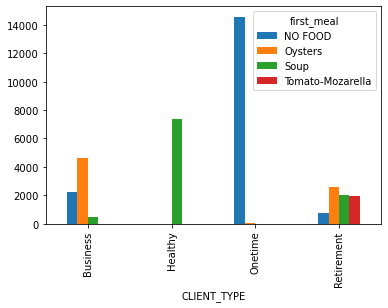

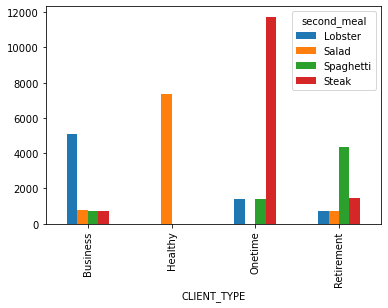

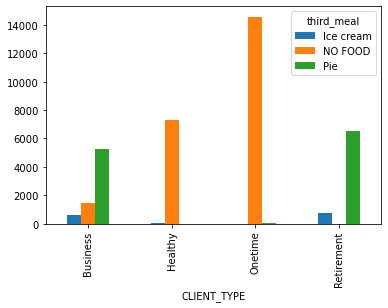

In [60]:
## Distribution of type of dishes per customer type
#first Course
join_df.groupby(['CLIENT_TYPE','first_meal']).size().unstack().plot(kind = 'bar')

#Second Course
join_df.groupby(['CLIENT_TYPE','second_meal']).size().unstack().plot(kind = 'bar')

#Third Course
join_df.groupby(['CLIENT_TYPE','third_meal']).size().unstack().plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of the cost of drink per course')

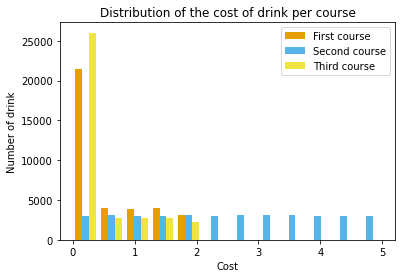

In [61]:
## Cost of the drinks per course


##  Plot of the distribution of the cost in each course 


# Make a separate list for each course
x1 = list(df['first_drink'])
x2 = list(df['second_drink'])
x3 = list(df['third_drink'])

# Assign colors for each course and the names
colors = ['#E69F00', '#56B4E9', '#F0E442']

names = ['First course', 'Second course', 'Third course']

         
# Make the histogram using a list of lists
# Assign colors and names
plt.hist([x1, x2, x3], bins = int(180/15),
         color = colors, label = names)

# Plot formatting
plt.legend()
plt.xlabel('Cost')
plt.ylabel('Number of drink')
plt.title('Distribution of the cost of drink per course')